In [1]:
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
print(os.path)

<module 'ntpath' from 'C:\\Users\\itsav\\.conda\\envs\\myenv\\lib\\ntpath.py'>


In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [7]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [8]:
print(df.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [38]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
df['gender']=label_encoder.fit_transform(df['gender'])
df['ever_married']=label_encoder.fit_transform(df['ever_married'])
df['work_type']=label_encoder.fit_transform(df['work_type'])
df['Residence_type']=label_encoder.fit_transform(df['Residence_type'])
df['smoking_status']=label_encoder.fit_transform(df['smoking_status'])


In [11]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB


In [42]:
df = df.iloc[:,1:]

In [43]:
from sklearn.preprocessing import StandardScaler

# Initialize a scaler
scaler = StandardScaler()

# Standardize numerical columns
df[['avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['avg_glucose_level', 'bmi']])


In [44]:
from scipy.stats.mstats import winsorize
df['avg_glucose_level']=winsorize(df['avg_glucose_level'],limits=[0.05,0.05])
df['bmi']=winsorize(df['bmi'],limits=[0.05,0.05])

In [45]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,2.434506,1.001234e+00,1,1
1,0,61.0,0,0,1,3,0,2.121559,4.615554e-16,2,1
2,1,80.0,0,1,1,2,0,-0.005028,4.685773e-01,2,1
3,0,49.0,0,0,1,2,1,1.437358,7.154182e-01,3,1
4,0,79.0,1,0,1,3,0,1.501184,-6.357112e-01,2,1


In [19]:
# Add age group (e.g., children, adults, seniors)
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 60, 100], labels=['Child', 'Adult', 'Senior'])

# Combine hypertension and heart_disease into a single feature
df['comorbidity'] = df['hypertension'] + df['heart_disease']

df['age_group']=label_encoder.fit_transform(df['age_group'])


In [20]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,comorbidity
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1,2,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1,2,0
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1,0,0
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1,2,1


In [25]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,comorbidity
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1,2,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1,2,0
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1,0,0
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1,2,1


In [22]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop(columns=['stroke'])
y = df['stroke']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [24]:
print("Before SMOTE:\n", y.value_counts())
print("After SMOTE:\n", pd.Series(y_resampled).value_counts())


Before SMOTE:
 stroke
0    4861
1     249
Name: count, dtype: int64
After SMOTE:
 stroke
1    4861
0    4861
Name: count, dtype: int64


In [28]:
print(X_resampled)

         id  gender        age  hypertension  heart_disease  ever_married  \
0      9046       1  67.000000             0              1             1   
1     51676       0  61.000000             0              0             1   
2     31112       1  80.000000             0              1             1   
3     60182       0  49.000000             0              0             1   
4      1665       0  79.000000             1              0             1   
...     ...     ...        ...           ...            ...           ...   
9717   1821       0  65.055885             0              0             1   
9718  71290       0  71.243037             0              0             1   
9719  13754       0  60.042895             0              0             1   
9720  27165       0  74.259869             0              0             1   
9721  51837       0  59.935017             0              0             1   

      work_type  Residence_type  avg_glucose_level        bmi  smoking_stat

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [58]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [59]:
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes (GaussianNB)': GaussianNB(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [61]:
# Train and evaluate each model
for name, model in models.items():
    print(f"\n{name} Results:")
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


K-Nearest Neighbors Results:
Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       975
           1       0.85      0.99      0.92       970

    accuracy                           0.91      1945
   macro avg       0.92      0.91      0.91      1945
weighted avg       0.92      0.91      0.91      1945


Decision Tree Results:
Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       975
           1       0.88      0.93      0.91       970

    accuracy                           0.90      1945
   macro avg       0.90      0.90      0.90      1945
weighted avg       0.90      0.90      0.90      1945


Naive Bayes (GaussianNB) Results:
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       975
           1       0.73      0.78 

C:\Users\itsav\.conda\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [23:17:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       975
           1       0.92      0.97      0.94       970

    accuracy                           0.94      1945
   macro avg       0.94      0.94      0.94      1945
weighted avg       0.94      0.94      0.94      1945



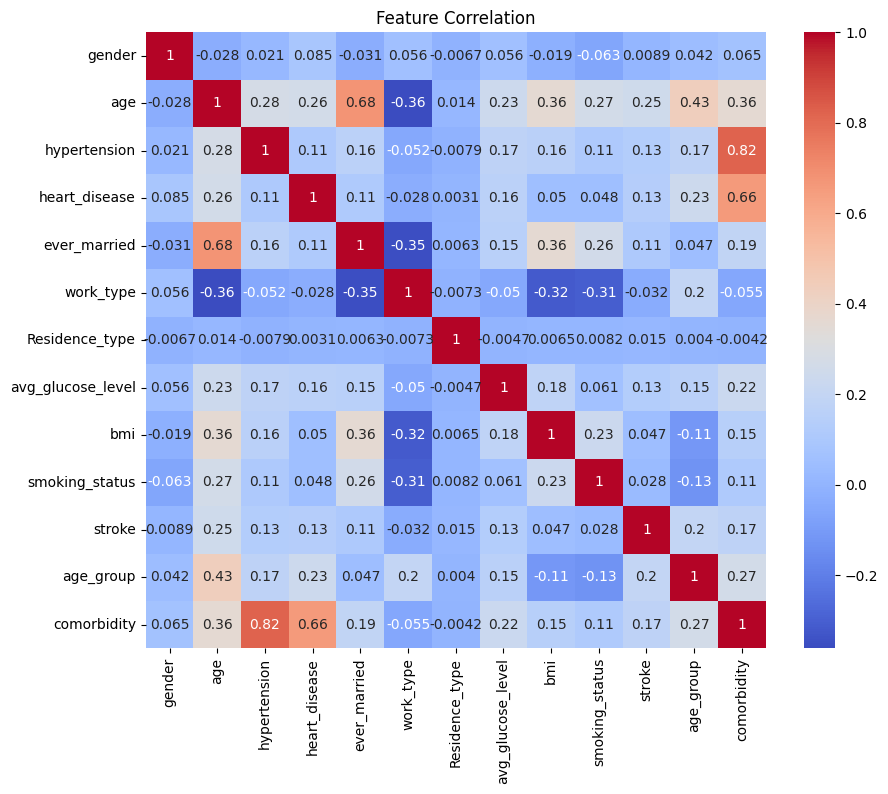

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


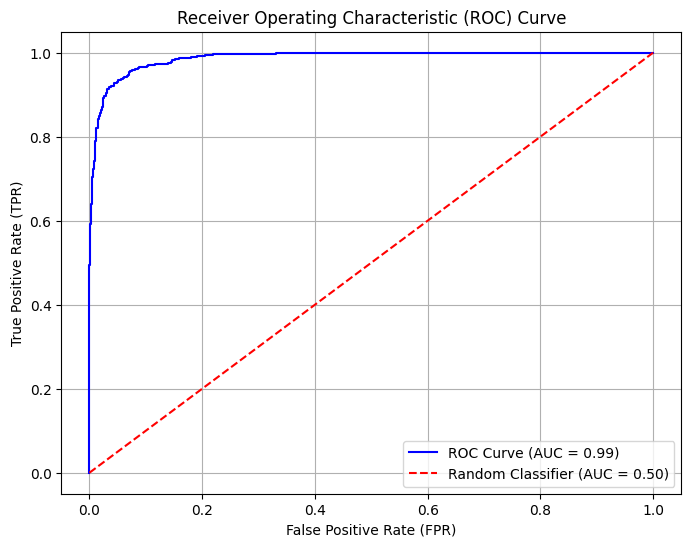

In [64]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming `model` is your trained XGBClassifier
# Predict probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "r--", label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [49]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,36.6,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,18.6,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [50]:
from scipy.stats.mstats import winsorize

df['avg_glucose_level'] = winsorize(df['avg_glucose_level'], limits=[0.05, 0.05])  

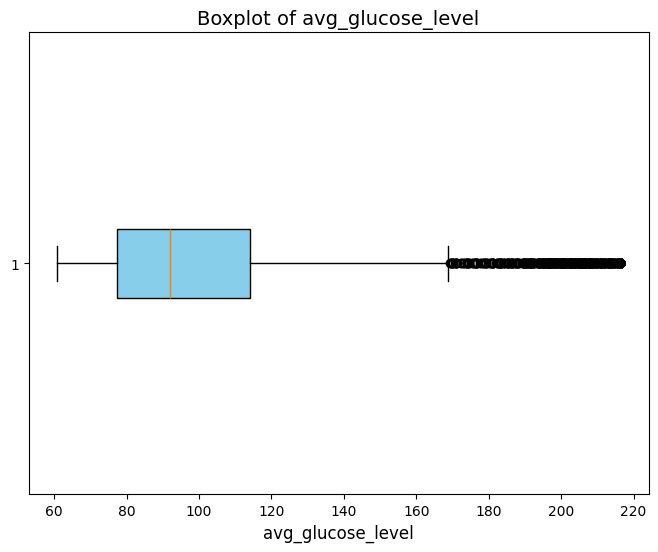

In [51]:
import matplotlib.pyplot as plt

# Creating a boxplot for the column 'avg_glucose_level'
plt.figure(figsize=(8, 6))  # Set the figure size
plt.boxplot(df['avg_glucose_level'], vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))

# Adding title and labels
plt.title('Boxplot of avg_glucose_level', fontsize=14)
plt.xlabel('avg_glucose_level', fontsize=12)

# Display the boxplot
plt.show()


In [69]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       975
           1       0.78      0.84      0.81       970

    accuracy                           0.80      1945
   macro avg       0.80      0.80      0.80      1945
weighted avg       0.80      0.80      0.80      1945



C:\Users\itsav\.conda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the model without the use_label_encoder parameter
model = XGBClassifier(eval_metric='logloss', random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 6],
    'min_child_weight': [1, 5],
    'subsample': [0.6, 1.0],
    'gamma': [0, 0.5],
    'reg_alpha': [0, 0.5],
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Evaluate the model on the test set
y_pred = grid_search.best_estimator_.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 128 candidates, totalling 384 fits


C:\Users\itsav\.conda\envs\myenv\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0, 'subsample': 0.6}
Best cross-validation accuracy: 0.9031748879937914

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       975
           1       0.87      0.94      0.91       970

    accuracy                           0.90      1945
   macro avg       0.91      0.90      0.90      1945
weighted avg       0.91      0.90      0.90      1945




K-Nearest Neighbors Results:


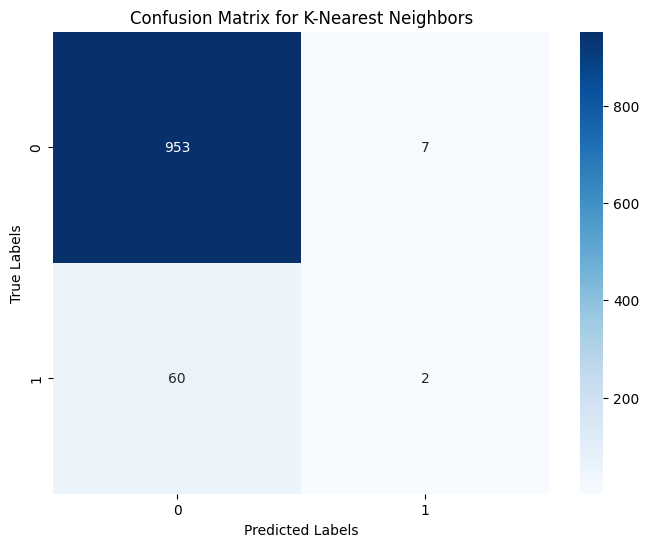


Decision Tree Results:


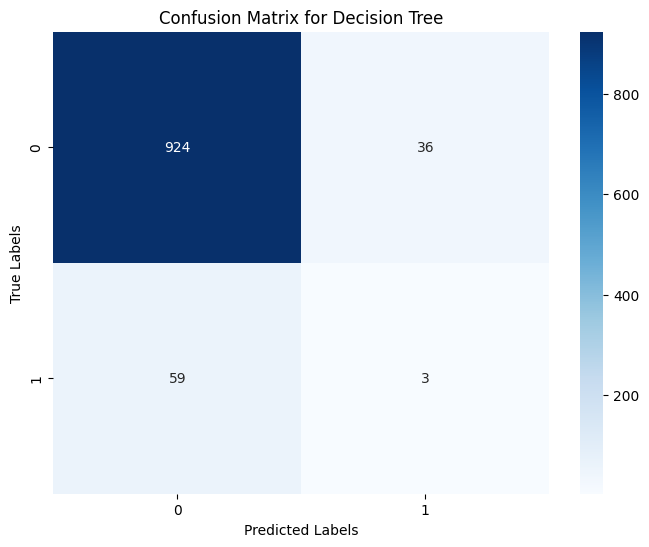


Random Forest Results:


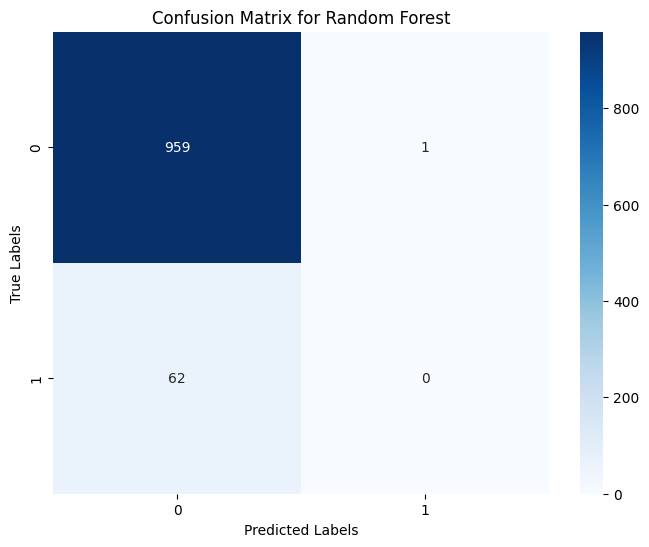


Naive Bayes (GaussianNB) Results:


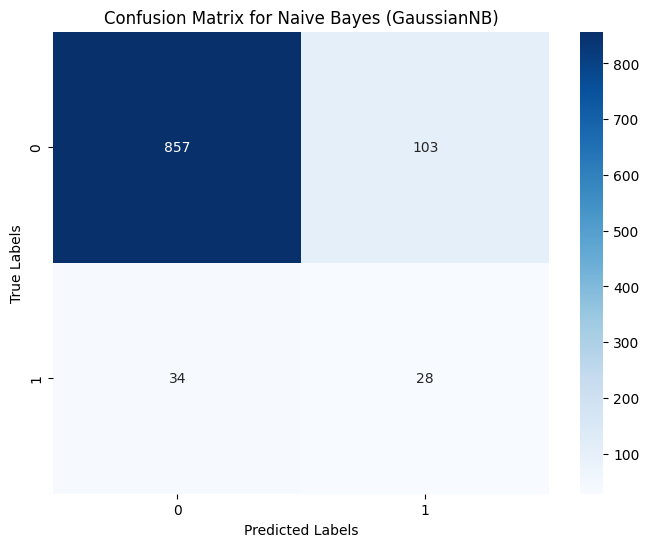


SVM Results:


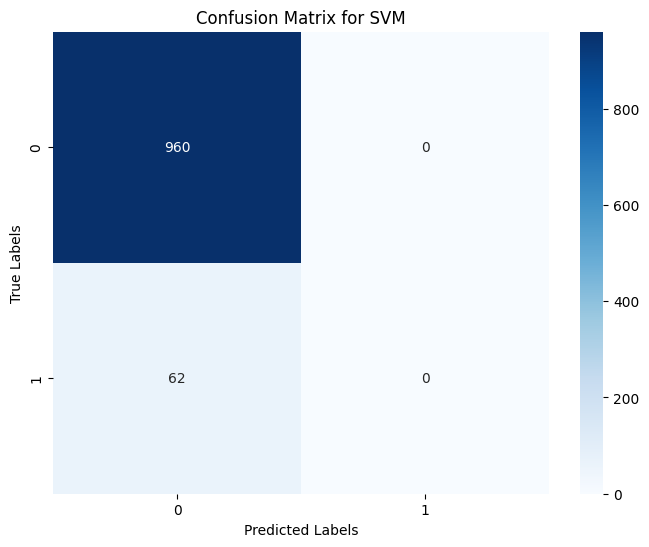


XGBoost Results:


C:\Users\itsav\.conda\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [19:28:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


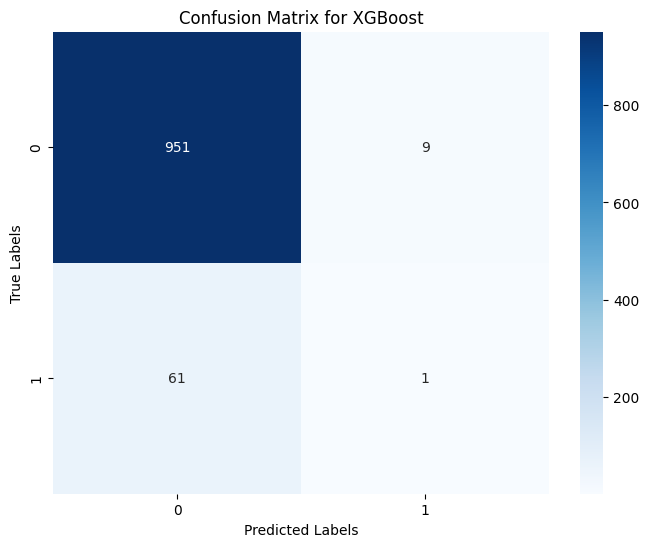

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
for name, model in models.items():
    print(f"\n{name} Results:")
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


In [70]:
import pandas as pd

data = {
  "Duration":{
    "0":60,
    "1":60,
    "2":60,
    "3":45,
    "4":45,
    "5":60
  },
  "Pulse":{
    "0":110,
    "1":117,
    "2":103,
    "3":109,
    "4":117,
    "5":102
  },
  "Maxpulse":{
    "0":130,
    "1":145,
    "2":135,
    "3":175,
    "4":148,
    "5":127
  },
  "Calories":{
    "0":409,
    "1":479,
    "2":340,
    "3":282,
    "4":406,
    "5":300
  }
}

df = pd.DataFrame(data)

print(df) 

   Duration  Pulse  Maxpulse  Calories
0        60    110       130       409
1        60    117       145       479
2        60    103       135       340
3        45    109       175       282
4        45    117       148       406
5        60    102       127       300
